In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.models import load_model

In [24]:
lbls = np.array([],dtype=int)
full_list = pd.DataFrame(np.zeros((1,400)))

In [25]:
ntrain = 8

In [26]:
for o in range(ntrain):
    lbls = np.append(lbls,np.loadtxt("imgs" + str(o) + "/labels" +str(o) + ".txt", usecols=range(20), dtype=int).reshape(400))
    for i in range(20):
        for j in range(20):
            im = Image.open("imgs" + str(o) + "/img" + str(i) + "_" + str(j) + ".png").convert("L")
            imarr = pd.Series(np.asarray(im).flatten().reshape(400))
            full_list = full_list.append(imarr,ignore_index=True)
    if o == 0:
        full_list = full_list.drop(0,axis=0)
        full_list = full_list.reset_index()
        full_list = full_list.drop('index',axis=1)

labels_all = pd.Series(lbls)

In [27]:
full_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Columns: 400 entries, 0 to 399
dtypes: float64(400)
memory usage: 9.8 MB


In [66]:
X = full_list.values
y = labels_all.values

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=69)

In [68]:
scaler = MinMaxScaler()

In [69]:
scaler.fit(X_train)

MinMaxScaler()

In [70]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [323]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=35,input_shape=(400,),activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=24,input_shape=(10,),activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=24,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=10,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 24)                264       
_________________________________________________________________
dropout_13 (Dropout)         (None, 24)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 24)                600       
_________________________________________________________________
dropout_14 (Dropout)         (None, 24)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                250       
Total params: 1,114
Trainable params: 1,114
Non-trainable params: 0
_________________________________________________________________


In [325]:
model.fit(x=X_train, 
          y=y_train,
          batch_size=75,
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 3040 samples, validate on 160 samples
Epoch 1/100
3040/3040 [==============================] - 1s 389us/sample - loss: 0.6745 - accuracy: 0.5809 - val_loss: 0.6649 - val_accuracy: 0.5500
Epoch 2/100
3040/3040 [==============================] - 0s 75us/sample - loss: 0.6641 - accuracy: 0.5977 - val_loss: 0.6570 - val_accuracy: 0.5500
Epoch 3/100
3040/3040 [==============================] - 0s 76us/sample - loss: 0.6555 - accuracy: 0.6125 - val_loss: 0.6464 - val_accuracy: 0.6000
Epoch 4/100
3040/3040 [==============================] - 0s 77us/sample - loss: 0.6574 - accuracy: 0.6016 - val_loss: 0.6482 - val_accuracy: 0.6000
Epoch 5/100
3040/3040 [==============================] - 0s 76us/sample - loss: 0.6559 - accuracy: 0.5984 - val_loss: 0.6440 - val_accuracy: 0.6187
Epoch 6/100
3040/3040 [==============================] - 0s 75us/sample - loss: 0.6534 - accuracy: 0.6151 - val_loss: 0.6354 - val_accuracy: 0.6625
Epoch 7/100
3040/3040 [==============================] - 0s 78us

Epoch 56/100
3040/3040 [==============================] - 0s 85us/sample - loss: 0.5233 - accuracy: 0.7579 - val_loss: 0.4666 - val_accuracy: 0.8062
Epoch 57/100
3040/3040 [==============================] - 0s 87us/sample - loss: 0.5213 - accuracy: 0.7556 - val_loss: 0.4669 - val_accuracy: 0.7750
Epoch 58/100
3040/3040 [==============================] - 0s 85us/sample - loss: 0.5191 - accuracy: 0.7618 - val_loss: 0.4616 - val_accuracy: 0.8125
Epoch 59/100
3040/3040 [==============================] - 0s 86us/sample - loss: 0.5065 - accuracy: 0.7638 - val_loss: 0.4358 - val_accuracy: 0.8375
Epoch 60/100
3040/3040 [==============================] - 0s 86us/sample - loss: 0.5129 - accuracy: 0.7720 - val_loss: 0.4590 - val_accuracy: 0.7812
Epoch 61/100
3040/3040 [==============================] - 0s 88us/sample - loss: 0.5202 - accuracy: 0.7579 - val_loss: 0.4595 - val_accuracy: 0.8125
Epoch 62/100
3040/3040 [==============================] - 0s 84us/sample - loss: 0.5240 - accuracy: 0.7543

In [82]:
model.save('img_classv2')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: img_classv2/assets


In [48]:
model = load_model('img_classv1')

In [326]:
model_loss = pd.DataFrame(model.history.history)
model_loss[['accuracy','val_accuracy']].max()

accuracy        0.800329
val_accuracy    0.856250
dtype: float64

<AxesSubplot:>

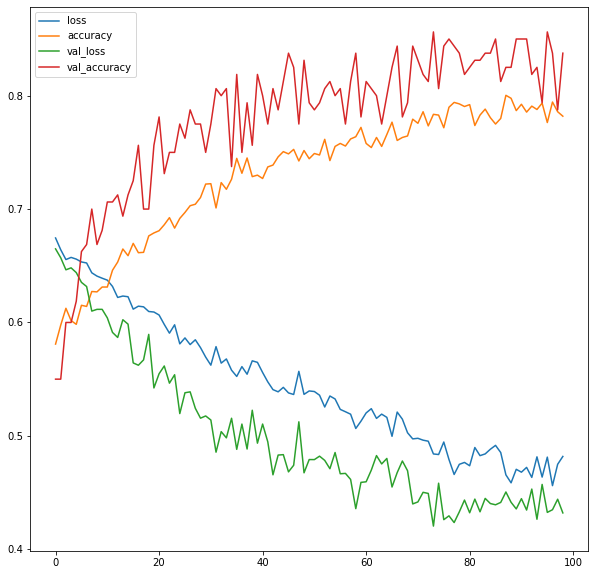

In [327]:
model_loss.plot(figsize=(10,10))

In [328]:
pred_prob = model.predict(X_test)
pred_class = model.predict_classes(X_test)

In [329]:
print(classification_report(y_test,pred_class))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85        81
           1       0.88      0.77      0.82        79

    accuracy                           0.84       160
   macro avg       0.84      0.84      0.84       160
weighted avg       0.84      0.84      0.84       160



In [18]:
pred = model.predict(scaler.transform(X)[2000:2400,:]).reshape((20,20))
pred = np.around(pred,2)

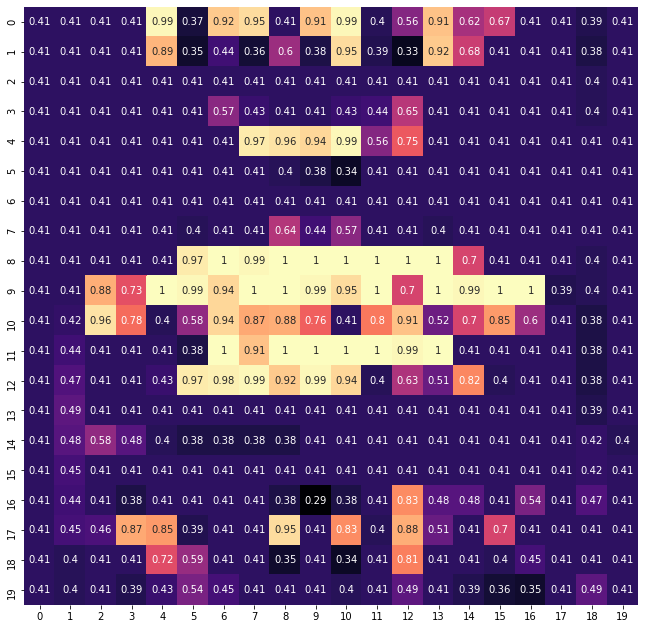

In [19]:
plt.figure(figsize=(11, 11))
ax = sns.heatmap(pred,cmap='magma',annot=True,cbar=False)

In [330]:
ext_path = "test1.jpeg"
extim = Image.open(ext_path).convert("L")
t = np.asarray(extim,dtype=int)

extarr = np.zeros((400,400))

for i in range(20):
    for j in range(20):
        extarr[20*i + j, :] = t[20 * i : 20 * (i + 1), 20 * j : 20 * (j + 1)].reshape(400)

In [331]:
pred_ext = model.predict(scaler.transform(extarr)).reshape((20,20))
pred_ext = np.around(pred_ext,2)

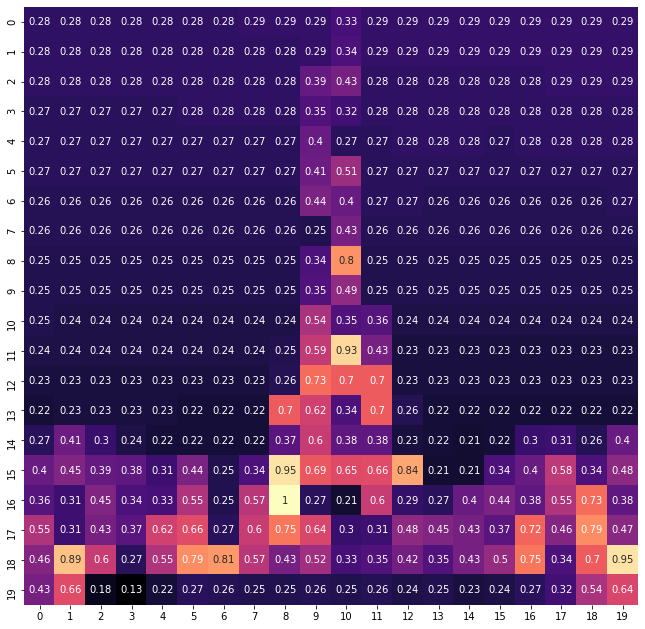

In [333]:
plt.figure(figsize=(11, 11))
ax = sns.heatmap(pred_ext,cmap='magma',annot=True,cbar=False)